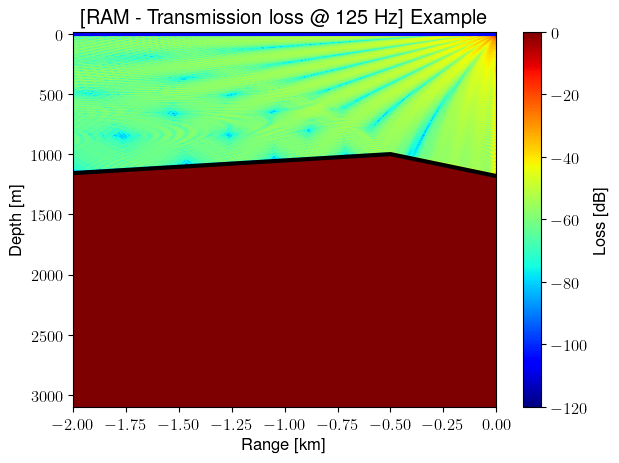

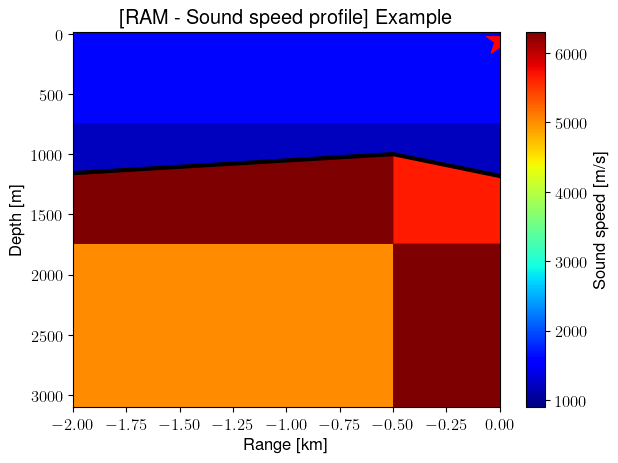

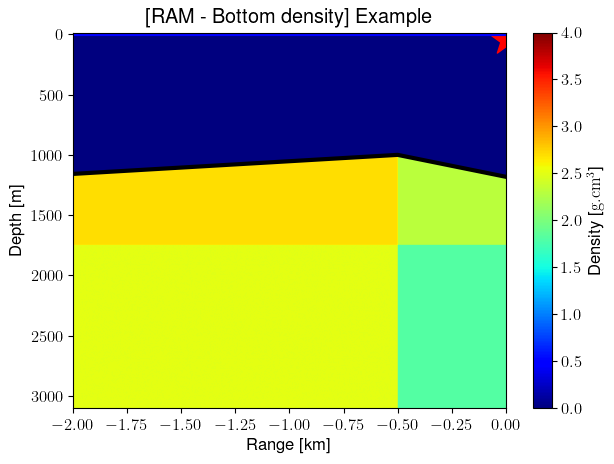

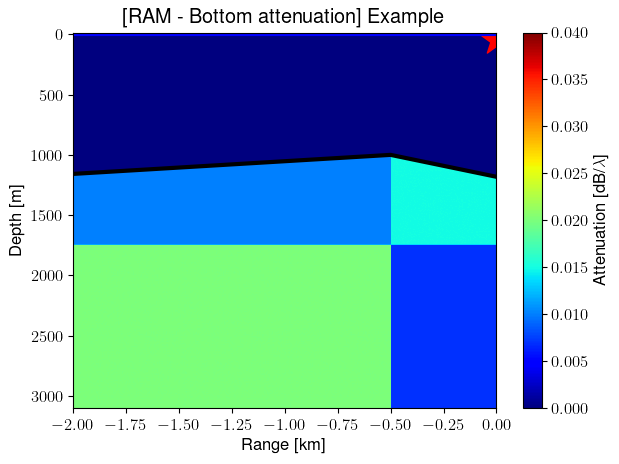

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': '[RAM - Bottom attenuation] Example'}, xlabel='Range [km]', ylabel='Depth [m]'>)

In [4]:
import arlpy.uwapm as pm
import numpy as np

x = np.linspace(-2000, 0, 1000)
z = np.linspace(-15, 3100,  720)

ssp_range = np.array([-5000, 0, 5000])
ssp_depth = np.array([100, 500, 1000, 2500])
ssp       = np.array([[1200,  1600, 1600],
                      [1200,  1600, 1600],
                      [1600,  1200, 1200], 
                      [1600,  1600, 1600]])

bot_range     = np.array([-10000, -500, 5000, 7000, 10000])
bot_interface = np.array([2000, 1000, 3000, 2000, 1500])

bot_xrange = np.array([-1000, 0, 2000])
bot_xdepth = np.array([np.min(bot_interface), 2500])

bot_attenuation = np.array([
    [0.01, 0.015, 0.012],
    [0.02, 0.007, 0.011]
])
bot_ssp = np.array([
    [6500, 5660, 6000],
    [5000, 6600, 5900]
])
bot_density = np.array([
    [2.7, 2.3, 2.5],
    [2.5, 1.8, 2.0]
])

env = pm.make_env2d(
            
    pad_inputData   = True, 
    name            = 'Example',
    
    # ALL: Receiver positoins
    rx_range        = x,                                                   # m
    rx_depth        = z,                                                   # m
    
    # ALL: Sound speed profiles
    ssp_range       = ssp_range,                                           # m
    ssp_depth       = ssp_depth,                                           # m
    ssp             = ssp,                                                 # m/s
    
    # ALL: Source freq and depth
    tx_freq         = 125,                                                 # Hz
    tx_depth        = 50,                                                  # m

    # ALL: Bottom interface
    bot_interface   = np.column_stack((bot_range,bot_interface)),          # m
                                                    
    # RAM: Bottom settings   
    bot_range       = bot_xrange,
    bot_depth       = bot_xdepth,
    bot_PwaveSpeed  = bot_ssp,
    bot_density     = bot_density,
    bot_PwaveAttn   = bot_attenuation,
    )

RAM = pm.RAM(env)
RAM.compute_transmission_loss()

RAM.plot_transmission_loss()
RAM.plot_ssp()
RAM.plot_bot_density()
RAM.plot_bot_attn()